In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
plt.style.use('ggplot')
from scipy import stats

### Central tendency

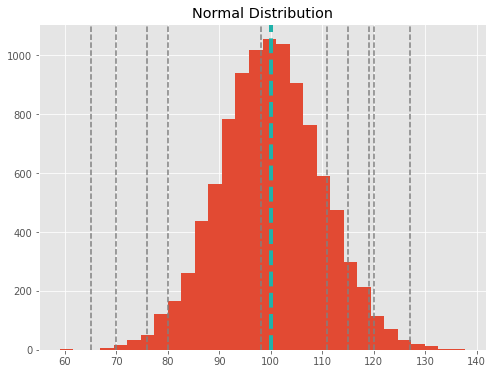

In [2]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)

figsize(8,6)
plt.title('Normal Distribution')
plt.hist(nums,bins = 30)
plt.axvline(np.mean(nums), linestyle = '--', color = 'lightseagreen', linewidth = 4)
for _ in range(10):
    plt.axvline(np.random.randint(60,130), linestyle = '--', color = 'gray')
plt.show()

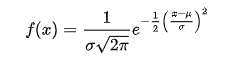

### Dispersion
variance - is a square(area)       
standard deviation - is a length(segment)       

In [3]:
def variance(arr,ddof = 0):
    N = len(arr)
    return ((arr - arr.mean())**2).sum() / (N - ddof)

def std(arr, ddof = 0):
    return np.sqrt(variance(arr, ddof = ddof))

Rewrite the formular

In [4]:
def mean(arr):
    '''Maximum likelihood estimation'''
    return sum(arr) / len(arr)

def deviation(arr):
    '''This is a distance'''
    return arr - mean(arr)

def squared_deviation(arr):
    '''This is the areas deviation-squares'''
    return deviation(arr) ** 2

def average_squared_deviation(arr):
    '''This the area of a standard sqarure'''
    return squared_deviation(arr).sum() / len(arr)

def average_root_squared_deviation(arr):
    '''This is the edge length of a standard square '''
    return np.sqrt(average_squared_deviation(arr))

In [5]:
average_root_squared_deviation(nums) == np.std(nums)

True

**Takeaway: Use a standard length or standard area of a square to measure dispersion**

### Where r U             
How much you are away from the mean - not comparable                    
How many standard deviations you are away from the mean - comparable                 

In [6]:
90 - nums.mean(), 80 - nums.mean()

(-9.983720357534011, -19.98372035753401)

far or not far - depens on variability of the distribution

In [7]:
(90 - nums.mean()) / std(nums), (80 - nums.mean()) / std(nums)

(-1.0055540183490372, -2.0127477120207717)

**Conclusion: The 2 samples are about 1 standard deviation from each other**

### Two Distributions - who is more unpopular

Xiaoming: -2.566666666666667, Xiaohua: -3.5277777777777777


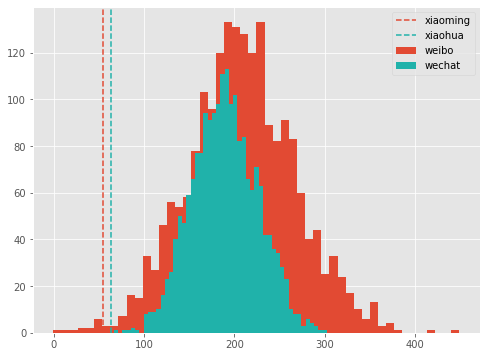

In [8]:
plt.style.use('ggplot')
weibo_mean = 208
wechat_mean = 190

wechat_std = 36
weibo_std = 60

xiaoming_weibo = 54
xiaohua_wechat = 63

# standard scaler, converted to standard normal distribution
Z_xiaoming = (xiaoming_weibo - weibo_mean) / weibo_std
Z_xiaohua = (xiaohua_wechat - wechat_mean) / wechat_std

print('Xiaoming: {}, Xiaohua: {}'.format(Z_xiaoming, Z_xiaohua))

plt.hist(stats.norm.rvs(loc = weibo_mean, scale = weibo_std, size = 2000),bins = 50, label = 'weibo')
plt.axvline(xiaoming_weibo, linestyle = '--', label = 'xiaoming')

plt.hist(stats.norm.rvs(loc = wechat_mean, scale = wechat_std, size = 2000),bins = 50, color = 'lightseagreen', label = 'wechat')
plt.axvline(xiaohua_wechat, linestyle = '--', color = 'lightseagreen', label = 'xiaohua')

plt.legend()
plt.show()

**Conclusion: Xiaohua is more unpopular than Xiaoming**   

In a standard normal distribution, Probability below 1.2 is  0.886


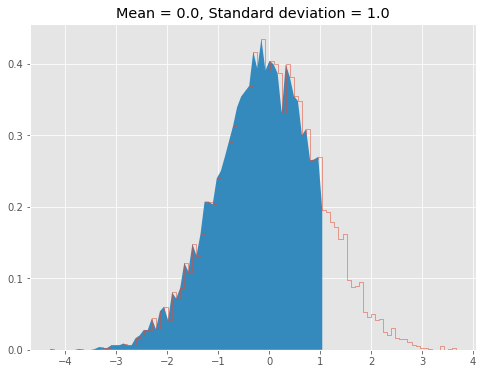

In [9]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)
standard_nums = (nums - nums.mean()) / nums.std()
val = 1.2

probability = len(standard_nums[standard_nums< val]) / len(standard_nums)

print(f'In a standard normal distribution, Probability below {val} is ',probability)
x = plt.hist(standard_nums,bins = 100, histtype = 'step', density = True)
loc = np.where(x[1]<val)[0][-1]
plt.fill_between(x[1][:loc],x[0][:loc] )
plt.title('Mean = {}, Standard deviation = {}'.format(round(standard_nums.mean(),3), standard_nums.std()))
plt.show()

Convert a distribution to a standard normal distribution

**Suppose we want to know the probability of a value less than -1**

#### Cumulative distribution Function to solve 
recall `empirical cumulative distribution function`    
which you learn in datacamp, `generated using observed data`        

Probability of obtaining a value less than `a give value` in a `standard normal distribution`

In [10]:
stats.norm.cdf(1.2)

0.8849303297782918

What about `between`, **subtract a negative cumulative prob from a positive cumulative prob**

In [11]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

#### Probability of a random draw from a standard normal distribution, that falls into a given range
#### And you can compute `any value in the population` with the `reset of the population`

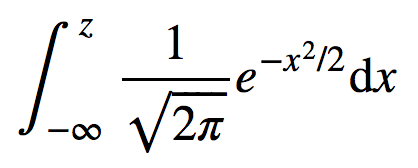

## Sampling Distribution

In [12]:
from itertools import combinations

In [13]:
die = [1,2,3,4]

possible_outcomes = [[a,b] for a in  die for b in die]
sample_means = [np.mean(out) for out in possible_outcomes]
probability = len([i for i in sample_means if i > 2.5]) / len(sample_means)

print('Number of possible outcomes', len(possible_outcomes))
print(possible_outcomes)
print('Sample means')
print(sample_means)
print('Probability of rolling 2 dices having mean value > 2.5:', probability)

Number of possible outcomes 16
[[1, 1], [1, 2], [1, 3], [1, 4], [2, 1], [2, 2], [2, 3], [2, 4], [3, 1], [3, 2], [3, 3], [3, 4], [4, 1], [4, 2], [4, 3], [4, 4]]
Sample means
[1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]
Probability of rolling 2 dices having mean value > 2.5: 0.375


Enumerate(穷举了可能出现的样本，并且每个样本出现的概率都是均等的，然后我们才能获得一个解析解)                       
这儿总体是均匀的离散分布（discrete uniform distribution）                     
且总体很小，我们才能穷举出所有sample出现的可能性

population: die    
samples = possible_outcomes[i]

population distribution: [1,2,3,4]                       
sampleing distribution: [1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]     
sample size = 2

In [14]:
np.mean(sample_means)

2.5

In [15]:
np.mean(possible_outcomes)

2.5

In [16]:
np.std(possible_outcomes)

1.118033988749895

In [17]:
np.std(sample_means)

0.7905694150420949

In [18]:
np.std(possible_outcomes) / np.std(sample_means)

1.414213562373095

In [19]:
sample_size = 2
np.sqrt(sample_size)

1.4142135623730951

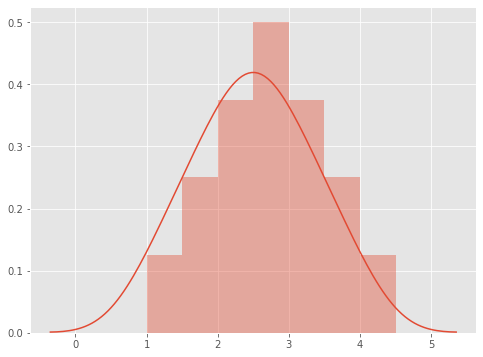

In [20]:
sns.distplot(sample_means, bins = np.arange(1,5, 0.5))
plt.show()

### Central limit theorem(背过就行了):                               
1. The sample mean distribution - [1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]  
    is called `sampling distribution`              
2. Sampling distribution is `normal distributed`  
3. `The mean of the sample means(mean of the sampling distribution) equals population mean`                   
4. The standard deviation of sampling distribution equals `sigma / np.sqrt(sample_size)`, where sigma is the standard deviation of the population     
5. The value mentioned in 4 is called `standard error - SE`     

**It is not easy to observe a normal distribution in real life**   
#### But you get it, and you can use the <font color = 'darked'> property of this normal distirbution 

#### Guess?

In [21]:
six_side_die = [1,2,3,4,5,6]
n = np.random.randint(1000,10000)
val1 = np.random.choice(six_side_die, size = (n, 2)).mean(axis = 1).mean()
val2 = np.random.choice(six_side_die, size = (n, 2)).mean(axis = 1).std()
# val1,val2

In [22]:
# np.mean(six_side_die),  np.std(six_side_die) / np.sqrt(2)

### Shapes      
mean - fixed                    
Standardard error(SE) - (depends on `sigma` and `np.sqrt(sample_size)`)     

sigma increase - SE increase                  
sample size increase - SE decrease           

IF WE COLLECTION MORE DATA ON EACH SAMPLE, THE SAMPLING DISTRIBUTION WILL GET SKINNER    

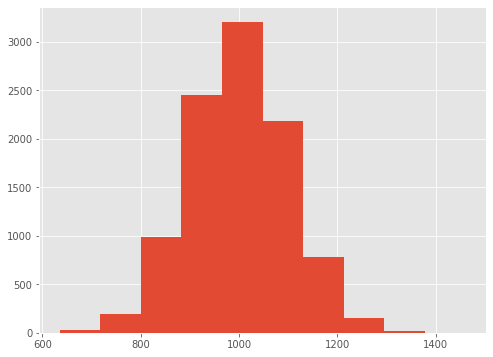

In [23]:
population = np.random.normal(1000,100,10000)
plt.hist(population)
plt.show()

**Make sampling distribution by sampling**

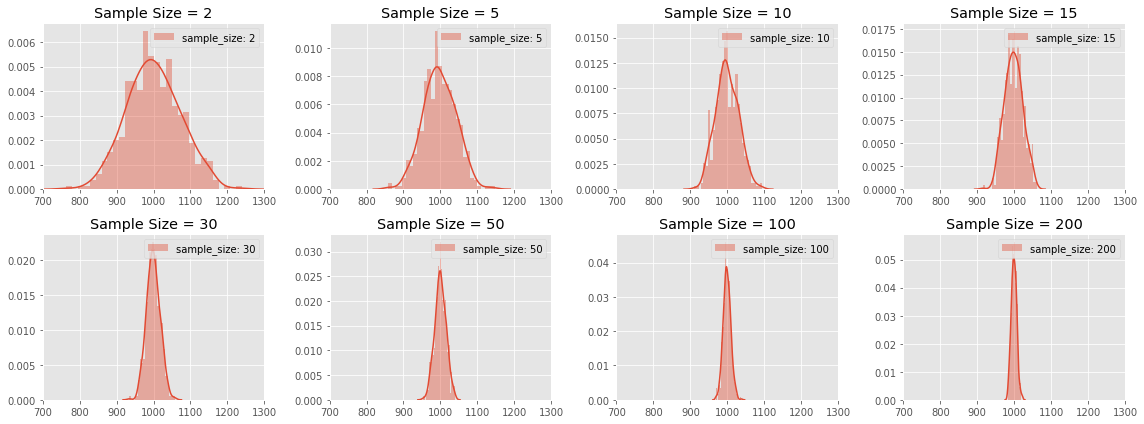

In [24]:
figsize(16,6)
sample_sizes = [2,5,10,15,30,50,100,200]
means = []
stds = []
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2,4,i+1)
    sampling_dist = np.random.choice(population, size = (500,sample_size)).mean(axis = 1)
    
    means.append(np.mean(sampling_dist))
    stds.append(np.std(sampling_dist))
    sns.distplot(sampling_dist, bins =30, kde = True, label = 'sample_size: {}'.format(sample_size))
    plt.xlim(700,1300)
    plt.legend()
    plt.title('Sample Size = {}'.format(sample_size))
plt.tight_layout()
plt.show()

### We know the distribution, we don't simulate

In [25]:
pd.DataFrame(zip(sample_sizes, means, stds), columns = ['samplesize','mean','se'])

samplesize         mean         se
0           2  1000.521824  72.400054
1           5   997.748981  44.154959
2          10   999.475457  30.676226
3          15   998.422713  24.541200
4          30   999.427361  18.243990
5          50  1000.062215  15.233731
6         100   999.201428  10.209546
7         200   999.468549   7.262185

In [26]:
population_mean = np.mean(population)
population_std = np.std(population)

print('Sample size,\t\t se')
for sample_size in sample_sizes:
    print(sample_size,'\t\t', population_std / np.sqrt(sample_size))

Sample size,		 se
2 		 71.14940826767506
5 		 44.99883685981365
10 		 31.8189826890814
15 		 25.980090574233465
30 		 18.370698220881188
50 		 14.229881653535013
100 		 10.062045812696649
200 		 7.114940826767507


### 我们可以通过简单的公式知道抽样分布的形状的 - 计算SE               
### 我们也可以通过sampling知道sampling distribution 的standard deviation = SE
### Anyway, 我们可以使用正态分布的性质了               

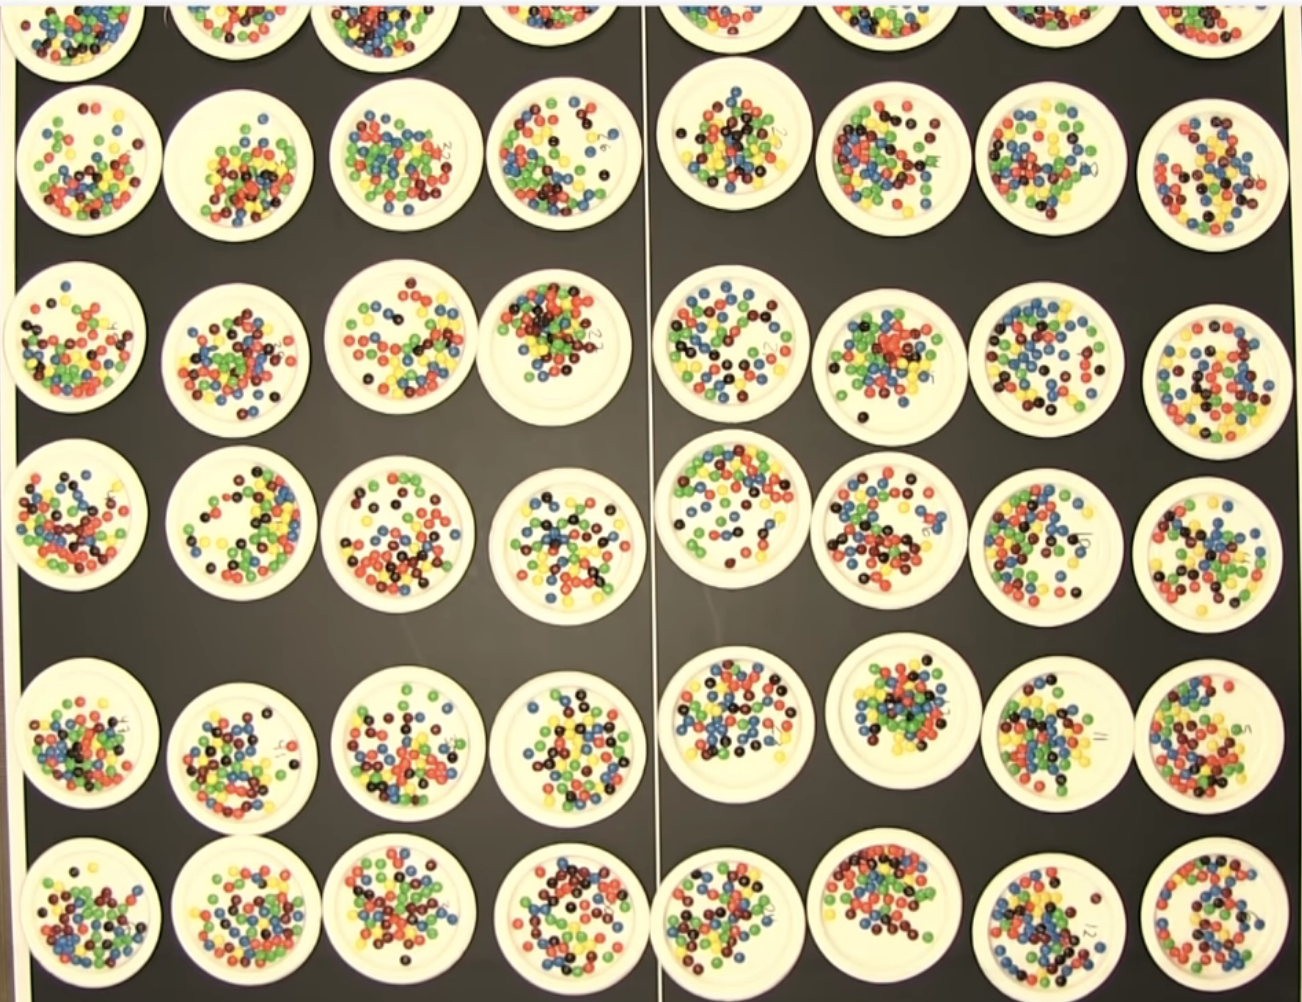

### Where does a sample mean falls on sampling distribution

7.908309455587392 7.846


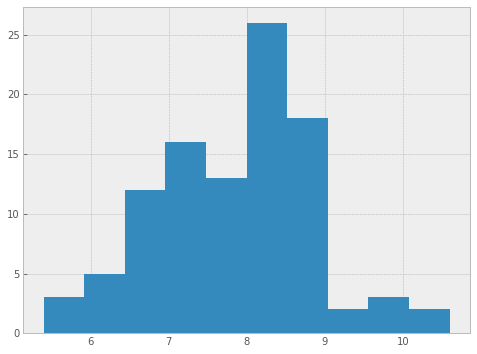

In [48]:
# Make some bags, ignore this step
colors = ['r','b','g','b','y','brown']
probs = np.random.randint(20,100,size = len(colors))
probs=  probs/probs.sum()
bags = np.random.choice(colors, p = probs, size = (1000,30))

# take 5 plate, calcuate mean number of green candies
blue_counts = [len([color for color in bag if color == 'g']) for bag in bags]
sampling_dist = np.random.choice(blue_counts, size = (100,5)).mean(axis = 1)
plt.hist(sampling_dist)
print(probs[2] * 30, np.mean(sampling_dist))

### Compare a sample with population - is this sample from population

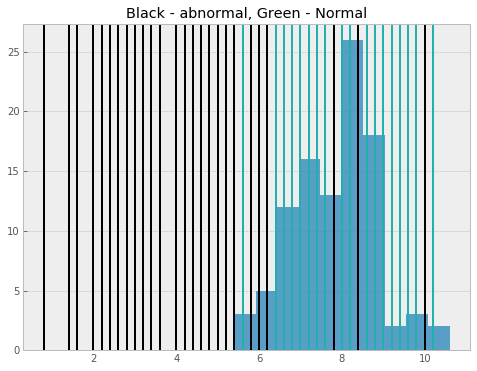

In [49]:
plt.style.use('bmh')
plt.hist(sampling_dist, alpha = 0.8)
figsize(8,6)

for _ in range(100):
    normal_bags = np.random.choice(colors, p = probs, size = (5,30))
    sample = [len([color for color in bag if color == 'g']) for bag in normal_bags]
    sample_mean = np.mean(sample)

    new_probs = np.random.randint(20,100,size = len(colors))
    new_probs=  new_probs/new_probs.sum()
    abnormal_bags = np.random.choice(colors, p = new_probs, size = (5,30))
    sample_ab = [len([color for color in bag if color == 'g']) for bag in abnormal_bags]
    sample_mean_ab = np.mean(sample_ab)

    
    plt.axvline(sample_mean, color = 'lightseagreen')
    plt.axvline(sample_mean_ab, color = 'black')
plt.title('Black - abnormal, Green - Normal')
plt.show()


### Theoretically

In [50]:
sampling_dist

array([ 8. ,  9. ,  7.8,  8.2,  6.8,  9. ,  8. ,  6.8,  7.8,  6. ,  8.2,
        8. ,  8.8,  8.8,  7.8,  5.8, 10.6,  9. ,  7.8,  6.8,  8.6,  8.6,
        8.4,  8. ,  7.2,  7.2, 10. ,  7. ,  8.8,  9.4,  6.6,  7.8,  7. ,
        7.8,  7.2,  9. ,  9.2,  8. ,  8. ,  7.4,  7.4,  6.8,  8.6,  5.4,
        6.6,  9. ,  7.6,  7.4,  8.2,  8.4,  8.4,  8. ,  7.4,  8.4,  8.6,
        7.2,  7. ,  7.6,  8. ,  7.4,  8.4,  6.8,  6.6,  7.8,  8.6,  8.2,
        6.8,  8.8,  8.4,  7.2,  7. ,  6.8,  7. ,  7.2,  6.6, 10.2,  8.4,
        6.2,  9.8,  7.6,  6.6,  8.2,  8. ,  8.2,  8.8,  8.4,  6.2,  8. ,
        8.2, 10. ,  8.8,  9. ,  6. ,  5.8,  7.6,  7.6,  6.2,  8.2,  9. ,
        7.8])

### Traditional Z Test procedure

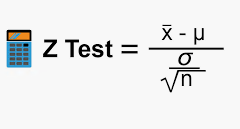

H0 : This sample comes from the population     $\mu(population) = \mu(sample)$                       
Ha: This sample not comes from the population  $\mu(population) \neq \mu(sample)$                      

In [54]:
population = [len([color for color in bag if color == 'g']) for bag in bags]
population_mean = np.mean(population)
population_std = np.std(population)
one_sample_mean = 5.8 #4
Z_statistic = (one_sample_mean - population_mean) / (population_std / np.sqrt(5))
p = stats.norm.cdf(Z_statistic)
alpha = 0.05
Z_critical = stats.norm.ppf(alpha)
Z_critical, Z_statistic, p

(-1.6448536269514729, -1.8734591185644123, 0.030502506479041264)

**Inference:**            
Z_critical < Z_statistic              
P > alpha = 0.05    
Unable to reject null hypothesis H0                 

Z - statistic: number of standard deviations(1) away from mean(0) in a standard normal distribution                                     
p - Probability of obtaining a value from sampling distribution less than or equal to a given value               
p is extremly low - reject null hypothesis            

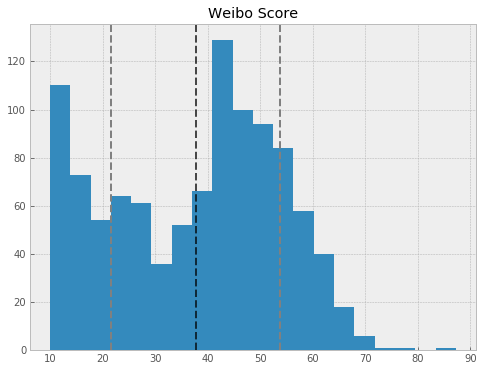

In [55]:
import pandas as pd
weibo = pd.read_excel('weibo.xlsx', header = None).values.flatten()
mu = np.mean(weibo)
sigma = np.std(weibo)

plt.title('Weibo Score')
plt.axvline(mu,linestyle = '--', color = 'k', alpha = 0.7)
plt.axvline(mu-sigma, linestyle = '--', color = 'gray')
plt.axvline(mu+sigma, linestyle = '--', color = 'gray')
plt.hist(weibo, bins = 20)
plt.show()

In [57]:
print(mu, sigma)

37.71905483252976 16.036658421908225


### See sampling distribution

In [58]:
sample_size = 250

In [59]:
se = sigma / np.sqrt(sample_size)
se

1.0142473334270294

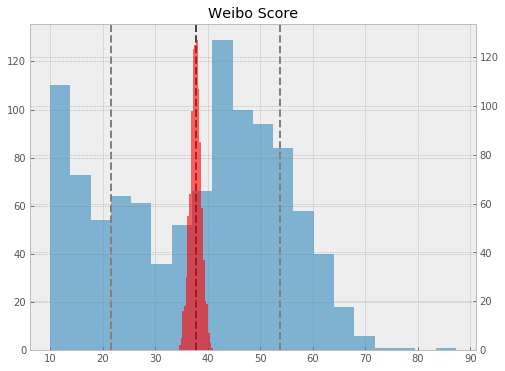

In [60]:
sd = np.random.normal(mu, se, 1000)

fig,ax = plt.subplots()
ax2 = ax.twinx()

plt.title('Weibo Score')
ax.axvline(mu,linestyle = '--', color = 'k', alpha = 0.7)
ax.axvline(mu-sigma, linestyle = '--', color = 'gray')
ax.axvline(mu+sigma, linestyle = '--', color = 'gray')
ax.hist(weibo, bins = 20, alpha = 0.6)
ax2.hist(sd, color = 'r', alpha = 0.6,bins = 20)
plt.show()

In [61]:
jay_followers = np.random.normal(40, sigma, size = sample_size).mean()
jay_mean = 40

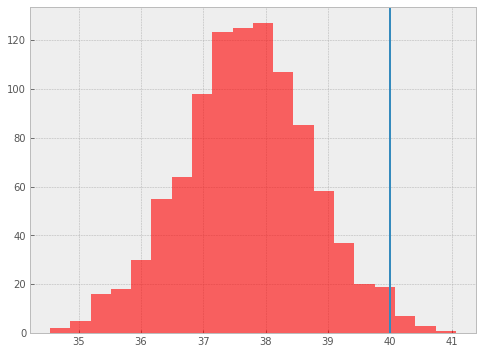

In [62]:
plt.hist(sd, color = 'r', alpha = 0.6,bins = 20)
plt.axvline(jay_mean)
plt.show()

Question: how many standard deviation above the mean for Jay followers

In [63]:
(jay_mean - mu)/  se

2.248904278370821

What is the probability of randomly select a sample from weibo, that is at least 40

In [64]:
1 - stats.norm.cdf((jay_mean - mu) / se)

0.012259293376508218

Jay followers coming froma different distribution from the population - the love songs and superstarts, may be 80s and early 90s

### Math - Infinite draw from future samples

Let $X = (X1, X2, X3,...Xn,)$ indicate n independent draw from distribution $F$            
Distribution $F$ has produced data $x = (x1, x2, x3,... ,xn)$     
An realization of $X = x$ has been observed           
Suppose we want to know the $Expectation$ of a single random draw from $F$, $\theta = E_{F}[X]$       
The obvious estimate is $\hat{\theta} = \overline{x}$            
The $\hat{\theta}$ is calculated using some known algorithm $t(x)$, in this case $t(x)$ = `np.mean(x)`  

$\hat{\theta} = t(x)$ is a realization of  $\hat{\Theta} = t(X)$          
We choose $t(X)$, and hope $\hat{\Theta}$ a good estimator of $\theta$           


Frequentism: **Infinite** draw from future trials.   $X^{(1)}, X^{(2)}, X^{(3)} ... ...$    
Get $\hat{\Theta}^{(1)}, \hat{\Theta}^{(2)}, \hat{\Theta}^{(3)} ... ...$       
Get standard deviation of $\hat{\Theta}^{(i)}$ = $Standard Error$   

According to Central limit theorem ${se}(\overline{X}) = [var_{F}(X) / n]^{1/2}$

Actually you get standard error from estimation $\hat{Var}(F) = \Sigma(x_{i} - \overline{x}) / (n - 1)$ = **Sample standard deviation / np.sqrt(n)**

#### Law of large numbers

In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment **a large number of times**. According to the law, the average of the results obtained from a large number of trials should be **close to the expected value** and will tend to become closer to the expected value as more trials are performed.[1]

### T _ test

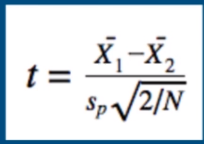

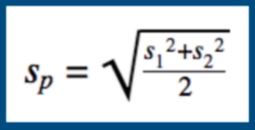

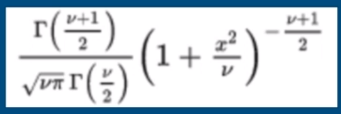

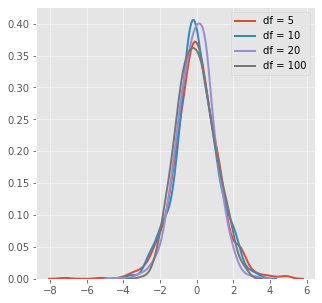

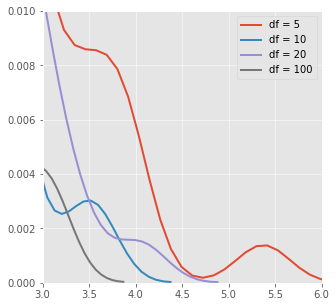

In [370]:
for df in [5,10,20, 100]:
    sns.distplot(stats.t.rvs(df = df,size = 1000),kde = True, label = 'df = {}'.format(df), hist = False)
plt.legend()
plt.show()

for df in [5,10,20, 100]:
    sns.distplot(stats.t.rvs(df = df,size = 1000),kde = True, label = 'df = {}'.format(df),hist = False)
plt.xlim(3,6)
plt.ylim(0,0.01)
plt.legend()
plt.show()

### One sample T test (sample vs population, or sample vs sample)

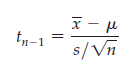

In [247]:
mu = 3593
xbar = 2400
n = 134
s = 4919
t = (mu-xbar) / (s * np.sqrt(1/n))
alpha = 0.05
t_critical = stats.t.ppf(alpha, df = n-1)
p = 1 - stats.t.cdf(t,df = n-1)
reject = t_critical < np.abs(t)
t,t_critical,p,reject

(2.8074757928499166, -1.6563912444045115, 0.002872477251535277, True)

**Customized test statistic with bootstrap**      
1. Converted my mean to population mean
2. H0: Not change on mean values observed
3. Ha: Change on mean values observed

In [251]:
sample = np.random.normal(xbar, s, n)
translated_sample = sample - sample.mean() + mu
p = (np.random.choice(translated_sample, size = (10000,n)).mean(axis = 1) < sample.mean()).mean()
reject = p < alpha
reject, p

(True, 0.0189)

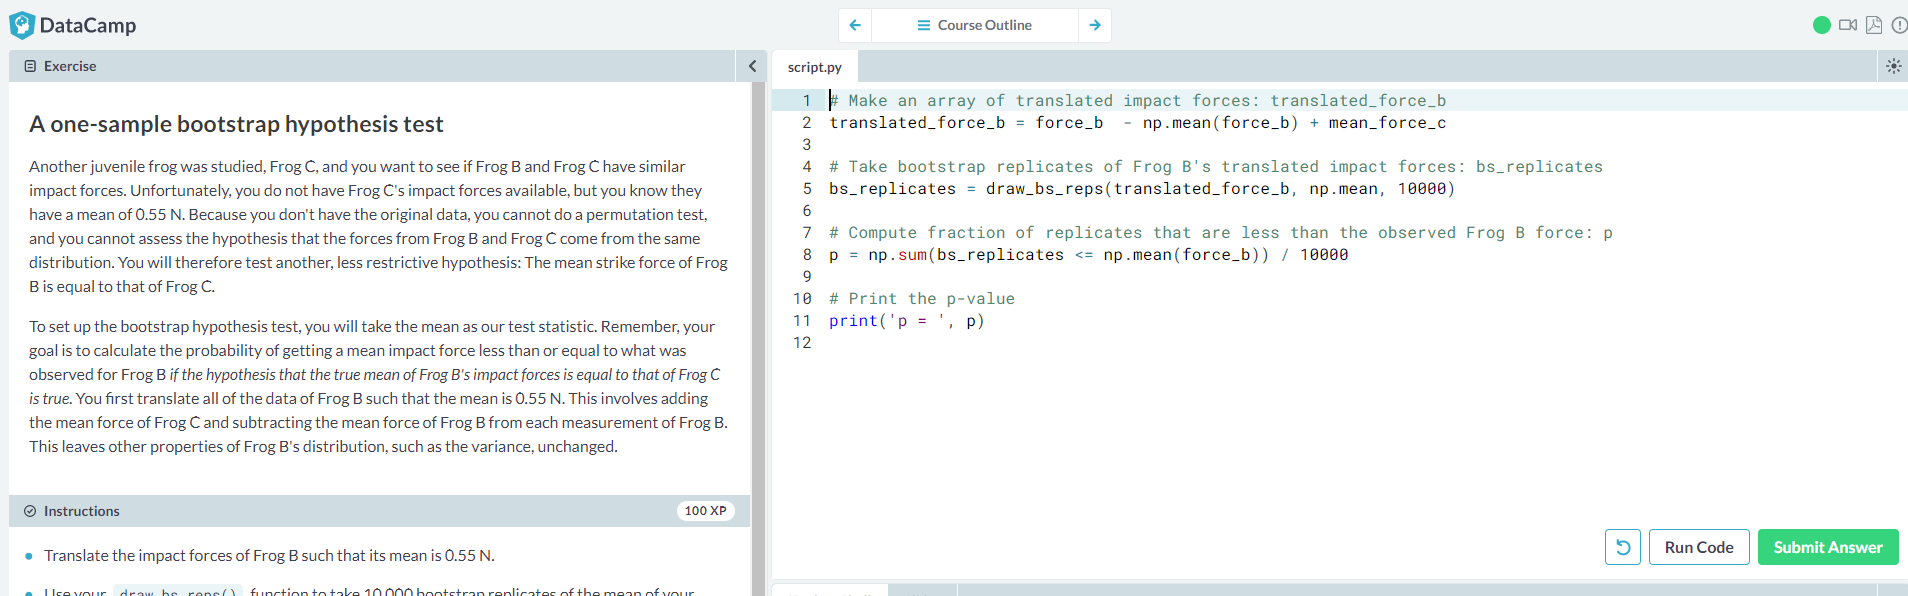

### 2 sample T test        
X1 sample 1    
X2 sample 2   
Is the mean difference ot X1 and X2 significant   
sp - pooled standard deviation   
N - size of each group


N 增加， t变大， p变小       
sp 越大，找到显著差异的难度就越大    

If you try to find statistical difference, you need to collect more sample

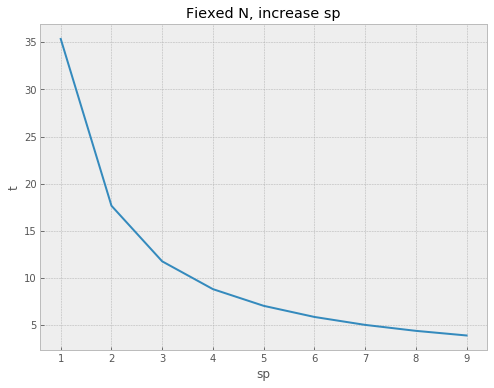

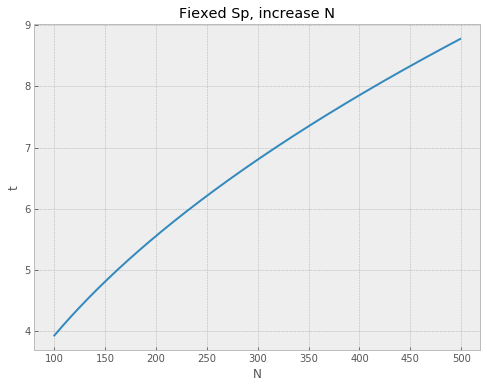

In [74]:
x1 = 20
x2 = 15
N = 100
t = []

sps = np.arange(1,10)
for sp in sps:
    t.append((x1 - x2)/(sp * np.sqrt(2/N)))
plt.plot(sps,t)
plt.title('Fiexed N, increase sp')
plt.xlabel('sp')
plt.ylabel('t')
plt.show()


x1 = 20
x2 = 15
Ns = np.arange(100,500)
t = []
sps = 5
for N in Ns:
    t.append((x1 - x2)/(sp * np.sqrt(2/N)))
    
plt.plot(Ns,t)
plt.title('Fiexed Sp, increase N')
plt.xlabel('N')
plt.ylabel('t')
plt.show()

T test:         
Is sample A **different** from sample B                
**Two tai**l paired t test      
Two samples are of **equal length**  
Two samples are **independent sample**    
The only one parameter for t test if degree of freedom

In [112]:
N = 10
A = np.random.randn(N) + 2
B = np.random.randn(N) 

# this is a sample, need to use Bessele's correction
var_a = np.var(A,ddof = 1)
var_b = np.var(B,ddof = 1)

s = np.sqrt((var_a + var_b) / 2)
t = (A.mean() - B.mean()) / (s * np.sqrt(2.0/N))
dof = 2 * N - 2

p = 1 - stats.t.cdf(t, df = dof)
p = 2 * p

t, p

(5.321829680915247, 4.651078377926332e-05)

In [113]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=5.321829680915246, pvalue=4.651078377942246e-05)

#### Bootstrap 2 sample T test

In [341]:
A = np.random.normal(110,20,100)
B = np.random.normal(100,20, 100)
A.mean(), B.mean(), A.std(), B.std()

(111.74314170751073, 100.5459752280438, 20.362575488050986, 19.681094327403635)

In [342]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=3.9340871467336105, pvalue=0.00011551168033513332)

如果A和B来源于同一个分布，那我将观测到什么？， 观测到的均值之差 不在  实际的均值之差分布 非常极端的位置                         
假设无区别的情况下，我们均值之差到底是多少              

In [343]:
concat_sample = np.concatenate([A,B])
shift_A = A - A.mean() + concat_sample.mean()
shift_B = B - B.mean() + concat_sample.mean()
shift_A.mean(), shift_B.mean(), shift_A.std(), shift_B.std()

(106.14455846777732,
 106.14455846777724,
 20.362575488050986,
 19.681094327403635)

In [344]:
bs_replicates_a = np.random.choice(shift_A, size = (10000, len(A))).mean(axis = 1)
bs_replicates_b = np.random.choice(shift_B, size = (10000, len(B))).mean(axis = 1)
bs_replicates = bs_replicates_a - bs_replicates_b
p = sum(bs_replicates >= (np.mean(A) - np.mean(shift_B))) / len(bs_replicates)
print('p-value =', p)

p-value = 0.024


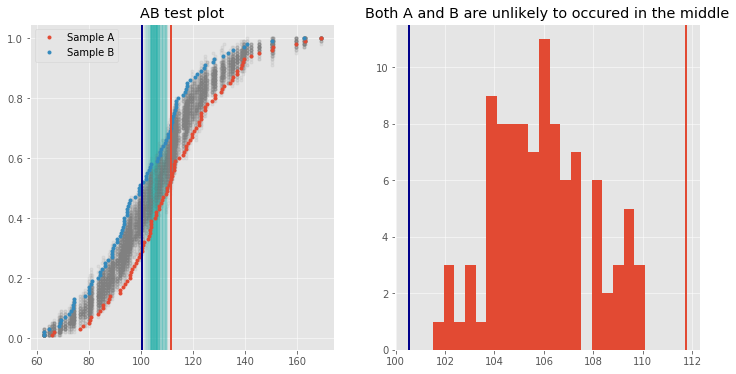

In [406]:
def ecdf(arr):
    return np.sort(arr), np.arange(1, len(arr) + 1) / len(arr)

figsize(12,6)

plt.subplot(1,2,1)
replications = []
for _ in range(100):
    sample = np.random.choice(concat_sample, size = len(A))
    x,y = ecdf(sample)
    plt.plot(x,y, linestyle = '', marker = '.', color = 'gray', alpha = 0.1)
    plt.axvline(np.mean(sample), color = 'lightseagreen', alpha = 0.1)
    replications.append(sample.mean())
    
xa , ya = ecdf(A)
xb,  yb = ecdf(B)

plt.plot(xa,ya, linestyle = '', marker = '.', label = 'Sample A')
plt.plot(xb,yb, linestyle = '', marker = '.', label = 'Sample B')
plt.axvline(np.mean(A))
plt.axvline(np.mean(B), color = 'darkblue')
plt.title('AB test plot')
plt.legend()


plt.subplot(1,2,2)
plt.hist(replications,bins = 20)
plt.axvline(np.mean(A))
plt.axvline(np.mean(B), color = 'darkblue')
plt.title('Both A and B are unlikely to occured in the middle')

plt.show()

### More Bootstrap - sample with replacement

In [167]:
mu = np.random.randint(100,200)
sigma = np.random.randint(10,30)
size = 20
A = np.random.normal(mu, sigma, size)

print('Mean and std:')
print(np.mean(A), np.std(A))

print('\nSE from formula')
se = np.std(A) / np.sqrt(size)
print(se)

print('\nSE from bootstrap')
trials = 5000
bootstrap_replicate =np.random.choice(A, size = (trials, size)).mean(axis = 1)
se_bs = np.std(bootstrap_replicate)
print(se_bs)

Mean and std:
154.20646952460552 24.933484768960007

SE from formula
5.5752966859350215

SE from bootstrap
5.6273466377735915


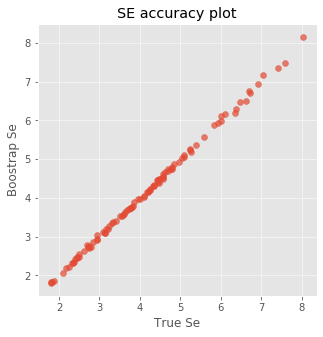

In [165]:
true_ses = []
bs_ses = []

for _ in range(100):
    mu = np.random.randint(100,200)
    sigma = np.random.randint(10,30)
    size = 20
    A = np.random.normal(mu, sigma, size)
    se = np.std(A) / np.sqrt(size)
    trials = 5000
    bootstrap_replicate =np.random.choice(A, size = (trials, size)).mean(axis = 1)
    se_bs = np.std(bootstrap_replicate)
    true_ses.append(se)
    bs_ses.append(se_bs)
    
figsize(5,5)
plt.scatter(true_ses, bs_ses, alpha = 0.7)
plt.xlabel('True Se')
plt.ylabel('Boostrap Se')
plt.title('SE accuracy plot')
plt.show()

With SE, you do everything~

In [168]:
mu = np.random.randint(100,200)
sigma = np.random.randint(10,30)
size = 20
A = np.random.normal(mu, sigma, size)

print('Mean and std:')
print(np.mean(A), np.std(A))

print('\nSE from formula')
se = np.std(A) / np.sqrt(size)
print(se)

print('\nSE from bootstrap')
trials = 5000
bootstrap_replicate =np.random.choice(A, size = (trials, size)).mean(axis = 1)
se_bs = np.std(bootstrap_replicate)
print(se_bs)

Mean and std:
180.33744754504147 27.685749906125057

SE from formula
6.1907218798154044

SE from bootstrap
6.238367684074026


**95% CI with formular**

In [173]:
lower = stats.norm.ppf(0.025) * se + np.mean(A)
higher = stats.norm.ppf(0.975) * se + np.mean(A)
(lower, higher)

(168.2038556222992, 192.47103946778375)

**95% CI with Bootstrap**

In [175]:
np.percentile(bootstrap_replicate, 2.5),np.percentile(bootstrap_replicate, 97.5)

(168.09234429538563, 192.32949285209924)

### Permutation Test

A permutation test (also called a **randomization test**, **re-randomization test**, or an exact test) is a type of statistical significance test in which <font color = 'darked'>the distribution of the test statistic under the null hypothesis is obtained by calculating all possible values of the test statistic under all possible rearrangements of the observed data points</font>. In other words, the method by which treatments are allocated to subjects in an experimental design is mirrored in the analysis of that design. If the labels are exchangeable under the null hypothesis, then the resulting tests yield exact significance levels; see also exchangeability. Confidence intervals can then be derived from the tests. The theory has evolved from the works of Ronald Fisher and E. J. G. Pitman in the 1930s.

To illustrate the basic idea of a permutation test, suppose we collect random variables ${\displaystyle X_{A}}$ and ${\displaystyle X_{B}}$ for each individual from two groups ${\displaystyle A}$ and ${\displaystyle B}$ whose sample means are ${\displaystyle {\bar {x}}_{A}}$ and ${\displaystyle {\bar {x}}_{B}}$, and that we want to know whether ${\displaystyle X_{A}}$ and ${\displaystyle X_{B}}$ come from the same distribution. Let ${\displaystyle n_{A}}$ and ${\displaystyle n_{B}}$ be the sample size collected from each group. The permutation test is designed to determine whether the observed difference between the sample means is large enough to reject, at some significance level, the null hypothesis$ H{\displaystyle _{0}}$ that the data drawn from ${\displaystyle A}$ is from the same distribution as the data drawn from ${\displaystyle B}$.

The test proceeds as follows. 

First, the **difference in means between the two samples** is calculated: this is the observed value of the test statistic, ${\displaystyle T_{\text{obs}}}$.

Next, the observations of groups ${\displaystyle A}$ and ${\displaystyle B}$ are <font color = 'darkred'><bold>pooled</bold></font>, and the difference in sample means is calculated and recorded for **every possible way of dividing the pooled values** into two groups of size ${\displaystyle n_{A}}$ and ${\displaystyle n_{B}}$ (i.e., for every permutation of the group labels A and B). The set of these calculated differences is the exact distribution of possible differences (for this sample) under the **null hypothesis that group labels are exchangeable** (i.e., are randomly assigned).

The one-sided p-value of the test is calculated as the proportion of sampled permutations where the difference in means was greater than or equal to ${\displaystyle T_{\text{obs}}}$. The two-sided p-value of the test is calculated as the proportion of sampled permutations where the absolute difference was greater than or equal to **${\displaystyle |T_{\text{obs}}|}$**

Alternatively, if the only purpose of the test is to reject or not reject the null hypothesis, one could sort the recorded differences, and then observe if ${\displaystyle T_{\text{obs}}}$ is contained within the middle ${\displaystyle (1-\alpha )\times 100}$% of them, for some significance level ${\displaystyle \alpha }$ . If it is not, we reject the hypothesis of identical probability curves at the ${\displaystyle \alpha \times 100\%}$ significance level.

Null: The labels of the 2 groups are exchangable              $T(pool) = T(obs)$             
Alternative: The labels of the 2 gropus arenot exchangable    $T(pool) \neq T(obs)$                                           

Test statistic customized
